<a href="https://colab.research.google.com/github/FatemehAbediK/EDA/blob/main/data_prep_data_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df=pd.read_csv('/content/drive/MyDrive/dataset files/COVID-19.csv')

In [65]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       279 non-null    object 
 1   AGE         279 non-null    int64  
 2   WBC         277 non-null    float64
 3   Piastrine   277 non-null    float64
 4   Neutrofili  209 non-null    float64
 5   Linfociti   209 non-null    object 
 6   Monociti    209 non-null    float64
 7   Eosinofili  209 non-null    float64
 8   Basofili    208 non-null    float64
 9   PCR         273 non-null    float64
 10  AST         277 non-null    float64
 11  ALT         266 non-null    float64
 12  ALP         131 non-null    float64
 13  GGT         136 non-null    float64
 14  LDH         194 non-null    float64
 15  TARGET      279 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 35.0+ KB


In [67]:
df['TARGET'].unique()

array([2, 1, 0])

In [68]:
index=df[df['Linfociti']==0.4].index
df['Linfociti'][index]=0.4

<ipython-input-68-cbd84fa59dc9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Linfociti'][index]=0.4


In [69]:
df.info()      #checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       279 non-null    object 
 1   AGE         279 non-null    int64  
 2   WBC         277 non-null    float64
 3   Piastrine   277 non-null    float64
 4   Neutrofili  209 non-null    float64
 5   Linfociti   209 non-null    object 
 6   Monociti    209 non-null    float64
 7   Eosinofili  209 non-null    float64
 8   Basofili    208 non-null    float64
 9   PCR         273 non-null    float64
 10  AST         277 non-null    float64
 11  ALT         266 non-null    float64
 12  ALP         131 non-null    float64
 13  GGT         136 non-null    float64
 14  LDH         194 non-null    float64
 15  TARGET      279 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 35.0+ KB


In [70]:
df.isnull().sum()

,0
SESSO,0
AGE,0
WBC,2
Piastrine,2
Neutrofili,70
Linfociti,70
Monociti,70
Eosinofili,70
Basofili,71
PCR,6


In [71]:
df.duplicated().sum()

0

In [72]:
df.drop_duplicates(inplace=True)

In [73]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


outliers

In [74]:
def outliers(df,target,feature , T):
  q1=df[df[target]==T][feature].quantile(0.25)
  q3=df[df[target]==T][feature].quantile(0.75)
  iqr=q3-q1
  upper_b=q3 + 1.5*iqr
  lower_b=q1 - 1.5*iqr

  return upper_b , lower_b


def upper_outliers(df, feature , target):
  ubs=[]
  for T in range(len[df[Target].unique()]):
    ubs.append(outliers(df,features,target , T))
  return ubs

def boxplot(df , features , target):
  fig=plt.figure(figsize=(8,6))
  ax=fig.add_axes([0,0,1,1])
  sns.boxplot(ax=ax , data=df , x='target' , y=feature)
  ax.axhline(y=y[0] , color='b')
  ax.axhline(y=y[1] , color='g')
  ax.axhline(y=y[2] , color='orange')
  y=upper_outliers(df,target , feature)


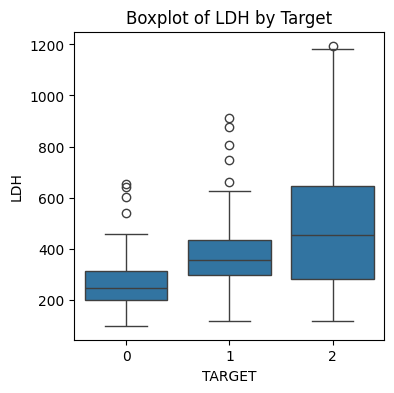

In [75]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TARGET', y='LDH', data=df)
plt.title('Boxplot of LDH by Target')
plt.show()

In [76]:
def upper_outliers(df, feature, target):
    ubs = []
    for val in df[target].unique():
        subset = df[df[target] == val]
        q3 = subset[feature].quantile(0.75)
        iqr = q3 - subset[feature].quantile(0.25)
        upper_bound = q3 + 1.5 * iqr
        ubs.append(upper_bound)
    return ubs

def drop_outliers(df, target, feature):
    ubs = upper_outliers(df, feature, target)
    for T in df[target].unique():
        ub = ubs[df[target].unique().tolist().index(T)]
        df = df.drop(df[(df[target] == T) & (df[feature] > ub)].index)
    return df


In [77]:
df=drop_outliers(df , 'TARGET' , 'LDH')

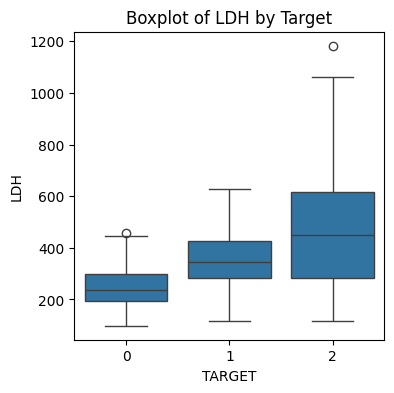

In [78]:
plt.figure(figsize=(4,4))
sns.boxplot(x='TARGET', y='LDH', data=df)
plt.title('Boxplot of LDH by Target')
plt.show()

missing

In [79]:
df.isnull().sum()

,0
SESSO,0
AGE,0
WBC,2
Piastrine,2
Neutrofili,69
Linfociti,69
Monociti,69
Eosinofili,69
Basofili,70
PCR,6


In [80]:
def missing(df):
    nan_per = 100 * (df.isnull().sum() / len(df))
    nan_per = nan_per[nan_per > 0].sort_values(ascending=False)
    return nan_per

# Function to plot missing values
def plot_missing_values(df):
    nan_per = missing(df)
    plt.figure(figsize=(4,4))
    sns.barplot(x=nan_per.index, y=nan_per)
    plt.xticks(rotation=90)  # Rotating labels for better readability
    plt.ylabel('Percentage of Missing Values')
    plt.title('Missing Data Percentage by Feature')
    plt.show()



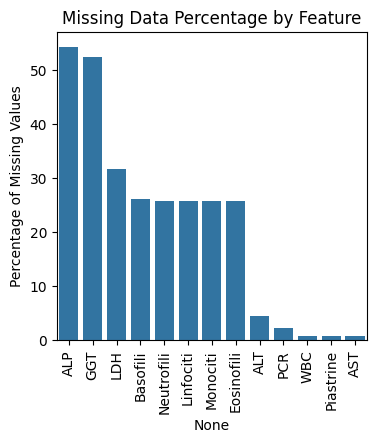

In [81]:
nan_per = missing(df)
plot_missing_values(df)

In [82]:
# dropna
df = df.dropna(axis=0, subset=['ALT', 'AST'])

# Check missing percentage for filling missing values
nan_per = missing(df)
print(nan_per[nan_per < 10])  # Display features with less than 10% missing values

# Fillna
df['PCR'].fillna(df['PCR'].mean(), inplace=True)
df['WBC'].fillna(df['WBC'].mean(), inplace=True)


PCR          1.556420
WBC          0.389105
Piastrine    0.389105
dtype: float64


<ipython-input-82-610e2f8cd6a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCR'].fillna(df['PCR'].mean(), inplace=True)
<ipython-input-82-610e2f8cd6a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WBC'].fillna(df['WBC'].mean(), inplace=True)


In [83]:
df.head(5)

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.000000,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.500000,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.700000,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.700000,96.0,33.0,80.0,42.0,651.0,2
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,NaN,85.275889,21.0,10.0,NaN,NaN,220.0,2


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 257 entries, 0 to 278
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SESSO       257 non-null    object 
 1   AGE         257 non-null    int64  
 2   WBC         257 non-null    float64
 3   Piastrine   256 non-null    float64
 4   Neutrofili  190 non-null    float64
 5   Linfociti   190 non-null    object 
 6   Monociti    190 non-null    float64
 7   Eosinofili  190 non-null    float64
 8   Basofili    189 non-null    float64
 9   PCR         257 non-null    float64
 10  AST         257 non-null    float64
 11  ALT         257 non-null    float64
 12  ALP         114 non-null    float64
 13  GGT         125 non-null    float64
 14  LDH         177 non-null    float64
 15  TARGET      257 non-null    int64  
dtypes: float64(12), int64(2), object(2)
memory usage: 34.1+ KB


##imputation##

In [85]:
np.sort(df['AGE'].unique())

array([ 0,  1, 18, 23, 25, 26, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89, 90, 91, 93, 94,
       95, 98])

In [86]:
##imputation##

def age_group(age):
    if (0 < age <= 1):
        return 'infant'
    elif (1 < age <= 19):
        return 'teenager'
    elif (19 < age <= 30):
        return 'adult'
    elif (30 < age <= 60):
        return 'old adult'
    else:
        return 'elderly'

df['age_group'] = df['AGE'].apply(age_group)

df['LDH'] = df.groupby('age_group')['LDH'].transform(lambda x: x.fillna(x.mean()))

<ipython-input-86-492327b8dfeb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age_group'] = df['AGE'].apply(age_group)
<ipython-input-86-492327b8dfeb>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LDH'] = df.groupby('age_group')['LDH'].transform(lambda x: x.fillna(x.mean()))


In [87]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET,age_group
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.000000,36.0,18.0,43.0,21.0,257.000000,2,old adult
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.500000,25.0,14.0,50.0,17.0,207.000000,2,old adult
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.700000,31.0,22.0,NaN,NaN,395.722222,2,elderly
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.700000,96.0,33.0,80.0,42.0,651.000000,2,elderly
5,M,77,3.0,162.0,2.0,0.4,0.4,0.1,NaN,85.275889,21.0,10.0,NaN,NaN,220.000000,2,elderly


In [93]:
print(df['Neutrofili'].dtype)
print(df['Neutrofili'].unique())

float64
[ 1.9  2.1  nan 14.   2.   3.3  4.2 10.   6.2  4.5  6.8  9.7  5.3  3.9
  6.3  7.1  4.3  4.8  3.1 16.1 14.4  4.4  4.1 12.9  5.9  8.8  3.4 16.
 15.7 15.9  7.6  5.7  6.9 18.9  4.   4.7  3.5  8.9  5.1  2.7  1.4  1.2
  9.2  8.   3.8  5.2  2.4  5.6  2.8  2.6  3.7 13.   5.8  7.4  5.4 12.2
  9.1  3.2  9.3  3.   3.6  8.2  0.8  1.8  2.2  7.3  1.5  2.5  6.5  0.9
 20.2  2.9  5.   0.5 13.5  5.5  1.1  9.6 24.3 10.5  7.9 13.9  7.5  9.5
  7.8 17.3 16.5 10.8 12.   9.4  6.7 14.1]


In [94]:
#we can do it separately:

male = df[df['SESSO'] == 'M']
female = df[df['SESSO'] == 'F']

male['Neutrofili'] = male.groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))
female['Neutrofili'] = female.groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))

df = pd.concat([male, female], axis=0)


#or just in place of the df:
"""
df.loc[df['SESSO'] == 'M', 'Neutrofili'] = df[df['SESSO'] == 'M'].groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))

df.loc[df['SESSO'] == 'F', 'Neutrofili'] = df[df['SESSO'] == 'F'].groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))
"""




<ipython-input-94-914a5f9bfb99>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['Neutrofili'] = male.groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))
<ipython-input-94-914a5f9bfb99>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['Neutrofili'] = female.groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))


"\ndf.loc[df['SESSO'] == 'M', 'Neutrofili'] = df[df['SESSO'] == 'M'].groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))\n\ndf.loc[df['SESSO'] == 'F', 'Neutrofili'] = df[df['SESSO'] == 'F'].groupby('age_group')['Neutrofili'].transform(lambda x: x.fillna(x.mean()))\n"

In [95]:
df.head()

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET,age_group
0,M,56,2.9,128.0,1.900000,0.8,0.2,0.0,0.0,29.000000,36.0,18.0,43.0,21.0,257.000000,2,old adult
1,M,56,3.5,151.0,2.100000,0.9,0.4,0.0,0.0,16.500000,25.0,14.0,50.0,17.0,207.000000,2,old adult
2,M,72,4.6,206.0,6.905797,NaN,NaN,NaN,NaN,193.700000,31.0,22.0,NaN,NaN,395.722222,2,elderly
3,M,72,16.5,316.0,14.000000,1.2,0.3,0.0,0.0,318.700000,96.0,33.0,80.0,42.0,651.000000,2,elderly
5,M,77,3.0,162.0,2.000000,0.4,0.4,0.1,NaN,85.275889,21.0,10.0,NaN,NaN,220.000000,2,elderly


In [96]:
df.to_csv('/content/drive/MyDrive/dataset files/COVID-19_new.csv')